# Markov chains

A salesman lives in town ‘a’ and is responsible for towns ‘a’, ‘b’,
and ‘c’. Each week he is required to visit a different town. When
he is in his home town, it makes no difference which town he
visits next so he flips a coin and if it is heads he goes to ‘b’ and if
tails he goes to ‘c’. However, after spending a week away from
home he has a slight preference for going home so when he is in
either towns ‘b’ or ‘c’ he flips two coins. If two heads occur, then
he goes to the other town; otherwise he goes to ‘a’. The
successive towns that he visits form a Markov chain with state
space $E = \{a, b, c\}$ where the random variable $X_n$ equals $a$, $b$, or
$c$ according to his location during week $n$.

![Imgur](https://i.imgur.com/h8iGivu.png)

- See: https://drive.google.com/file/d/0B-dmEvN59Z2ZNVh5MDV5YjlxMzQ/view


### Start with theoretical solution

$$
\boldsymbol{ \pi P = \pi}, \\
\sum_{i \in E} \pi_i = 1
$$

$$
-\pi_a + 0.75 \pi_b + 0.75 \pi_c = 0 \\
0.5 \pi_a - \pi_b + 0.25 \pi_c = 0 \\
0.5 \pi_a + 0.25 \pi_b - \pi_c = 0 \\
$$

$$
\pi_a + \pi_b + \pi_c = 1
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.matrix('0.5 -1 0.25; 0.5 0.25 -1; 1 1 1')

b = np.matrix('0; 0; 1')

pi = np.linalg.solve(A, b)
print("Solution for pa, pb, bc:", pi.T)

Solution for pa, pb, bc: [[ 0.42857143  0.28571429  0.28571429]]


### Numerical solution

The n-step transition probability from 
$i$ to $j$ is the probability of being at $j$ exactly $n$ steps after being at $i$. 
We denote this by $q^{(n)}_{ij}$:
$$
q^{(n)}_{ij} = P (X_n = j|X_0 = i).
$$
The $n^{th}$ power of the transition matrix gives the
n-step transition probabilities
$$
q^{(n)}_{ij} \text{ is the } (i, j) \text{ entry of }Q^n.
$$

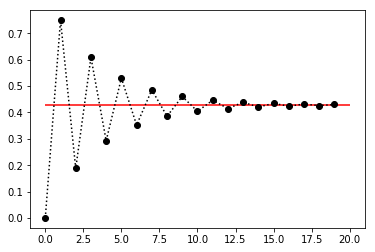

In [2]:
Q = np.matrix("0 0.5 0.5; 0.75 0 0.25; 0.75 0.25 0")

n = 20

cities = {'a': 0, 'b': 1, 'c': 2}

start_city, final_city = 'b', 'a'

p_final_city = []

for i in range(n):
    p_final_city += [(Q**i)[cities[start_city], cities[final_city]]]

plt.hlines(pi[cities[final_city]], 0, n, 'r')
plt.plot(p_final_city, ':ko')
plt.show()

### MM1 system simulation

An operator of a small grain elevator has a single unloading dock.
Arrivals of trucks during the busy season form a Poisson process with a mean arrival
rate of four per hour. Because of varying loads (and desire of the drivers to talk) the
length of time each truck spends in front of the unloading dock is approximated
by an exponential random variable with a mean time of 14 minutes. Assuming that
the parking spaces are unlimited, the M/M/1 queueing system describes the waiting
lines that form. Calculate:
   1. The probability of the unloading dock being idle.
   2. The probability that there are exactly three trucks waiting.
   3. The probability that four or more trucks are in the system.
   
### Poisson process

Let' start simulating a poisson process

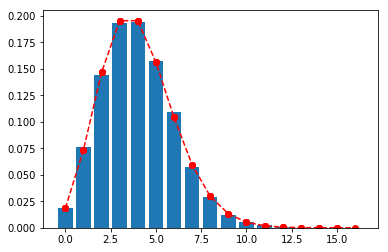

In [3]:
from scipy.stats import poisson
from scipy.stats import expon

t = 1  # We will simulate 1 hour
lmbda = 4  # 4 arrivals per hour

def arrivals():
    a = [0.0]
    while a[-1] < t:
        a.append(a[-1] + expon.rvs(scale=1/lmbda))
        
    if a[-1] > t:
        a.pop()
        
    return a

rep = 10000
arrival_count = [len(arrivals()) - 1 for i in range(rep)]

unique, counts = np.unique(arrival_count, return_counts=True)
plt.bar(unique, counts / rep)

x = np.linspace(0, max(arrival_count), dtype='int')  # variable range
px = poisson.pmf(x, lmbda)
plt.plot(x, px, '--ro')

plt.show()

### MM1 Queue waiting times simulation

In [14]:
def queue_simulation(lmbda, mu, time, warmup=1000):
    C = []
    start_time = 0
    end_time = 0
    arrival_time = 0
    while end_time < time:
        arrival_time += expon.rvs(scale=1/lmbda)
        start_time = max(arrival_time, end_time) 
        service_time = expon.rvs(scale=1/mu)
        end_time = start_time + service_time
        if arrival_time > warmup:
            C.append((arrival_time, start_time, service_time, end_time))
        
    return C

def print_customers(C):
    for i, c in enumerate(C):
        print("C[", i, "]: ", end=" ")
        for e in c:
            print(round(e, 2), end=" ")
        print()
        
print_customers(queue_simulation(4, 60/14, 1, 0))

C[ 0 ]:  0.13 0.13 0.18 0.31 
C[ 1 ]:  0.24 0.31 0.1 0.41 
C[ 2 ]:  0.52 0.52 0.13 0.65 
C[ 3 ]:  0.56 0.65 0.38 1.02 


In [20]:
lmbda, mu, time, warmup = 4, 60/14, 100000, 3000
C = np.array(queue_simulation(lmbda, mu, time, warmup))

W = np.mean(C[:,3] - C[:,0])
Wq = np.mean(C[:,1] - C[:,0])
print("W = ", W, ", Wq = ", Wq)

W =  3.55957168256 , Wq =  3.32636776176


- Try to figure out if the values above are correct. That is, validate the simulation.